<a href="https://colab.research.google.com/github/Andy7204/Machine_Learning_Projects/blob/main/Data_Visualisation_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
try:
    df = pd.read_csv("netflixdata.csv")
except UnicodeDecodeError:
    df = pd.read_csv("netflixdata.csv", encoding='latin1')
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [3]:
df.shape

(584, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [5]:
df.Genre.value_counts()

,count
Genre,
Documentary,159
Drama,77
Comedy,49
Romantic comedy,39
Thriller,33
...,...
Action-adventure,1
Animation / Science Fiction,1
Anthology/Dark comedy,1


In [6]:
df.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [7]:
score_8 = df[df['IMDB Score']>=8]

<Axes: xlabel='IMDB Score', ylabel='Title'>

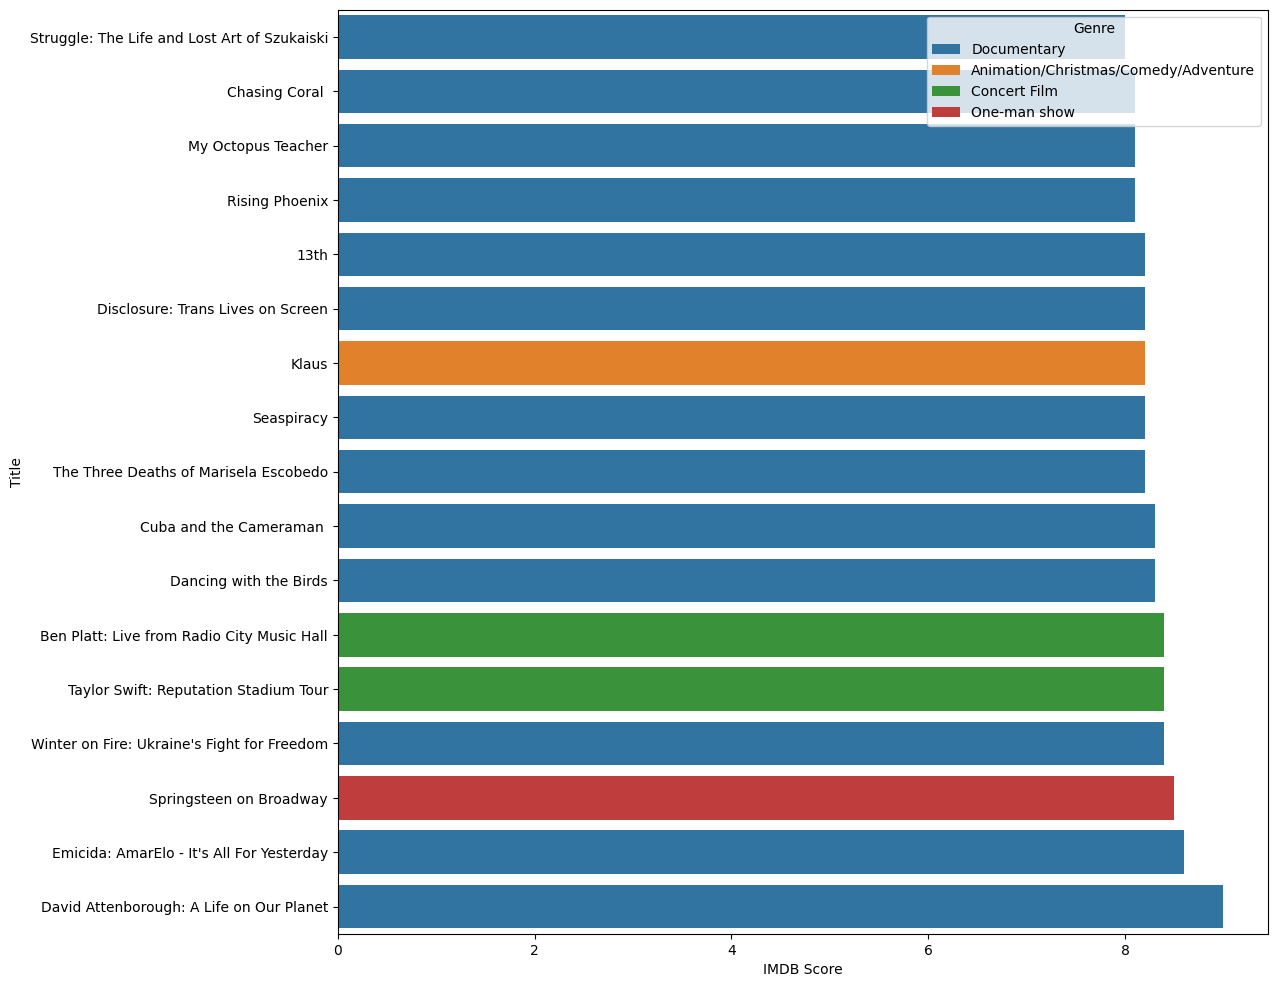

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

plt.figure(figsize = (12,12))
sns.barplot(x = 'IMDB Score', y = 'Title',hue ='Genre', data = score_8)

In [9]:
fig = px.bar(score_8, x='IMDB Score', y= 'Title', color='Genre')
fig.show()

## Above are the movies which have ratings 8 or more

<Axes: xlabel='IMDB Score', ylabel='Title'>

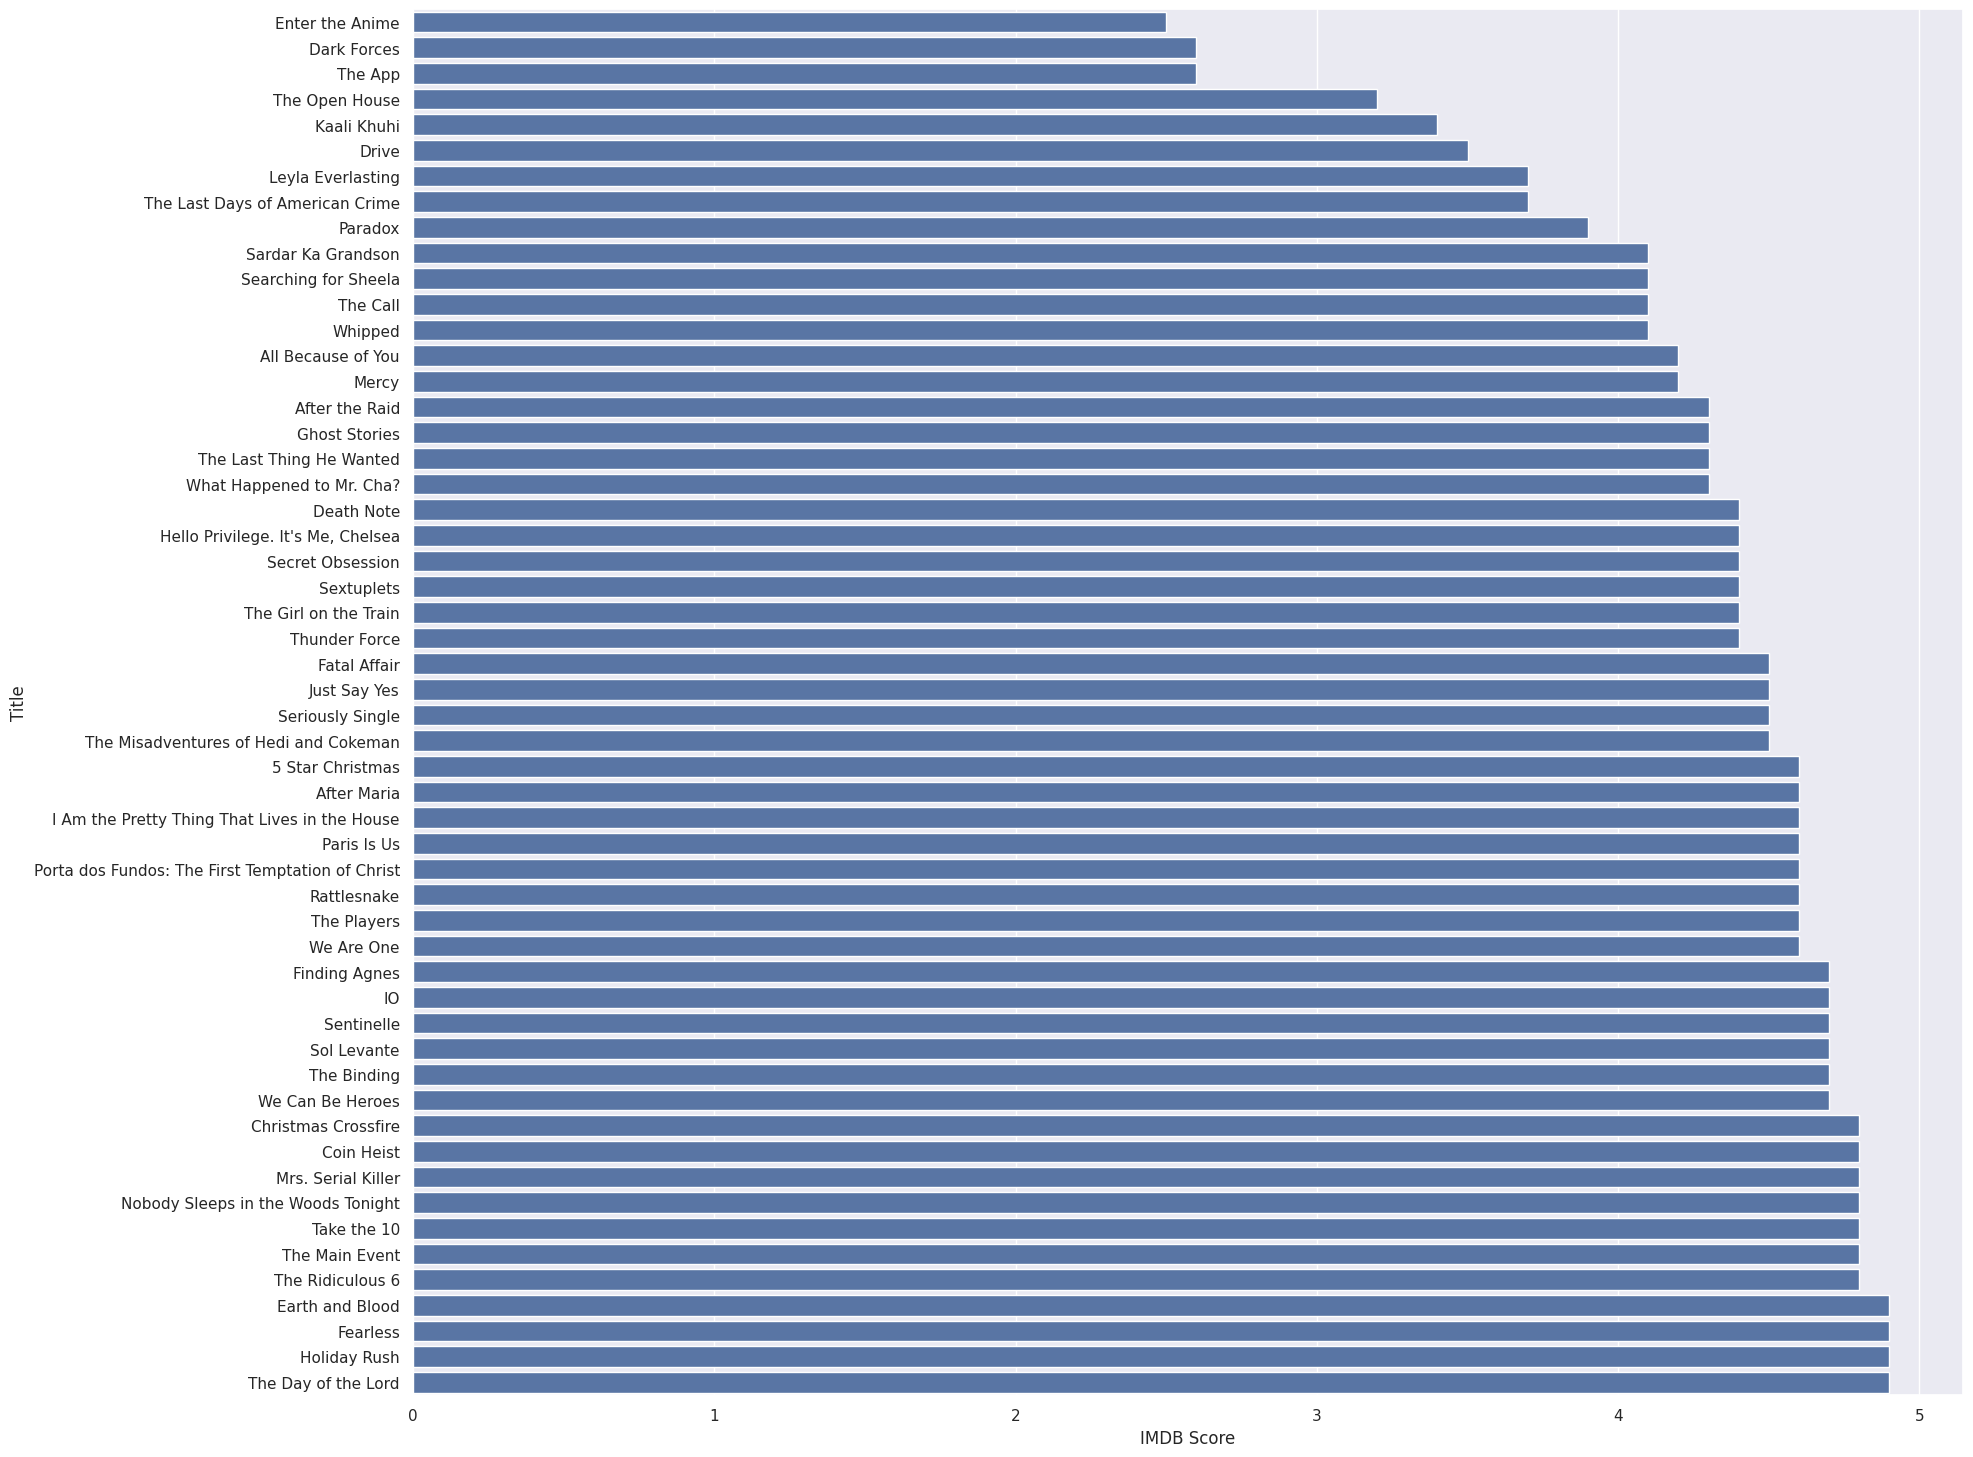

In [10]:
sns.set(rc={'figure.figsize':(20,18)})
score_5 = df[df['IMDB Score']<5]
sns.barplot(x="IMDB Score", y="Title",data=score_5)

In [11]:
fig = px.bar(score_5, x='IMDB Score', y= 'Title', color='Genre')
fig.show()

# Above are the movies which have ratings less than 5

In [15]:
genre_low = df[df['IMDB Score']<5][['Genre','Title', 'IMDB Score','Language']].sort_values('IMDB Score', ascending = True)

In [16]:
genre_low[:15]

,Genre,Title,IMDB Score,Language
0,Documentary,Enter the Anime,2.5,English/Japanese
1,Thriller,Dark Forces,2.6,Spanish
2,Science fiction/Drama,The App,2.6,Italian
3,Horror thriller,The Open House,3.2,English
4,Mystery,Kaali Khuhi,3.4,Hindi
5,Action,Drive,3.5,Hindi
6,Comedy,Leyla Everlasting,3.7,Turkish
7,Heist film/Thriller,The Last Days of American Crime,3.7,English
8,Musical/Western/Fantasy,Paradox,3.9,English
9,Comedy,Sardar Ka Grandson,4.1,Hindi


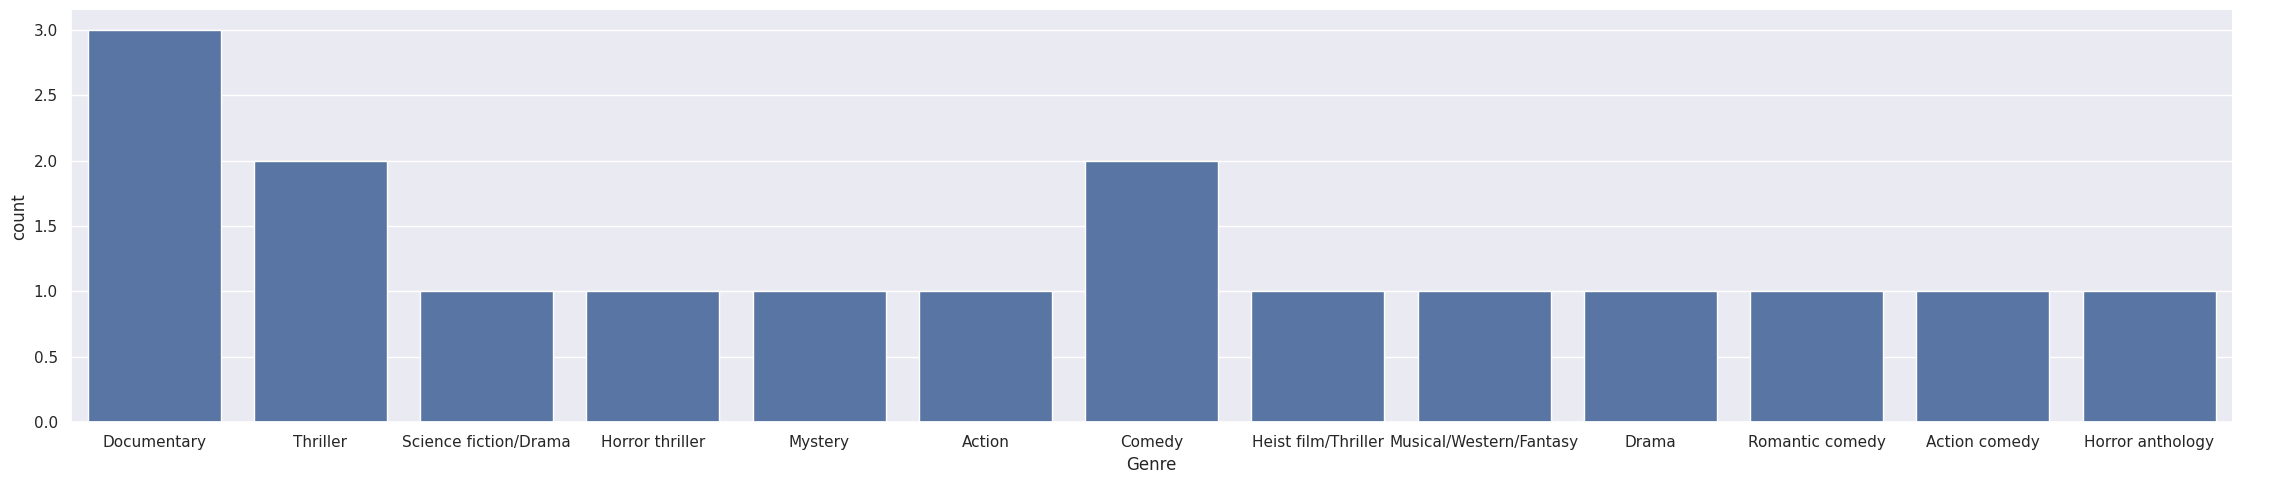

In [17]:
sns.catplot(x="Genre", kind="count", data=genre_low[:17], aspect= 50.7/11.2)

In [18]:
fig = px.bar(genre_low, x='Genre', y= 'IMDB Score', color = 'Title')
fig.show()

# Above are Top Genres & movies which have ratings lower than 5

<Axes: xlabel='Genre'>

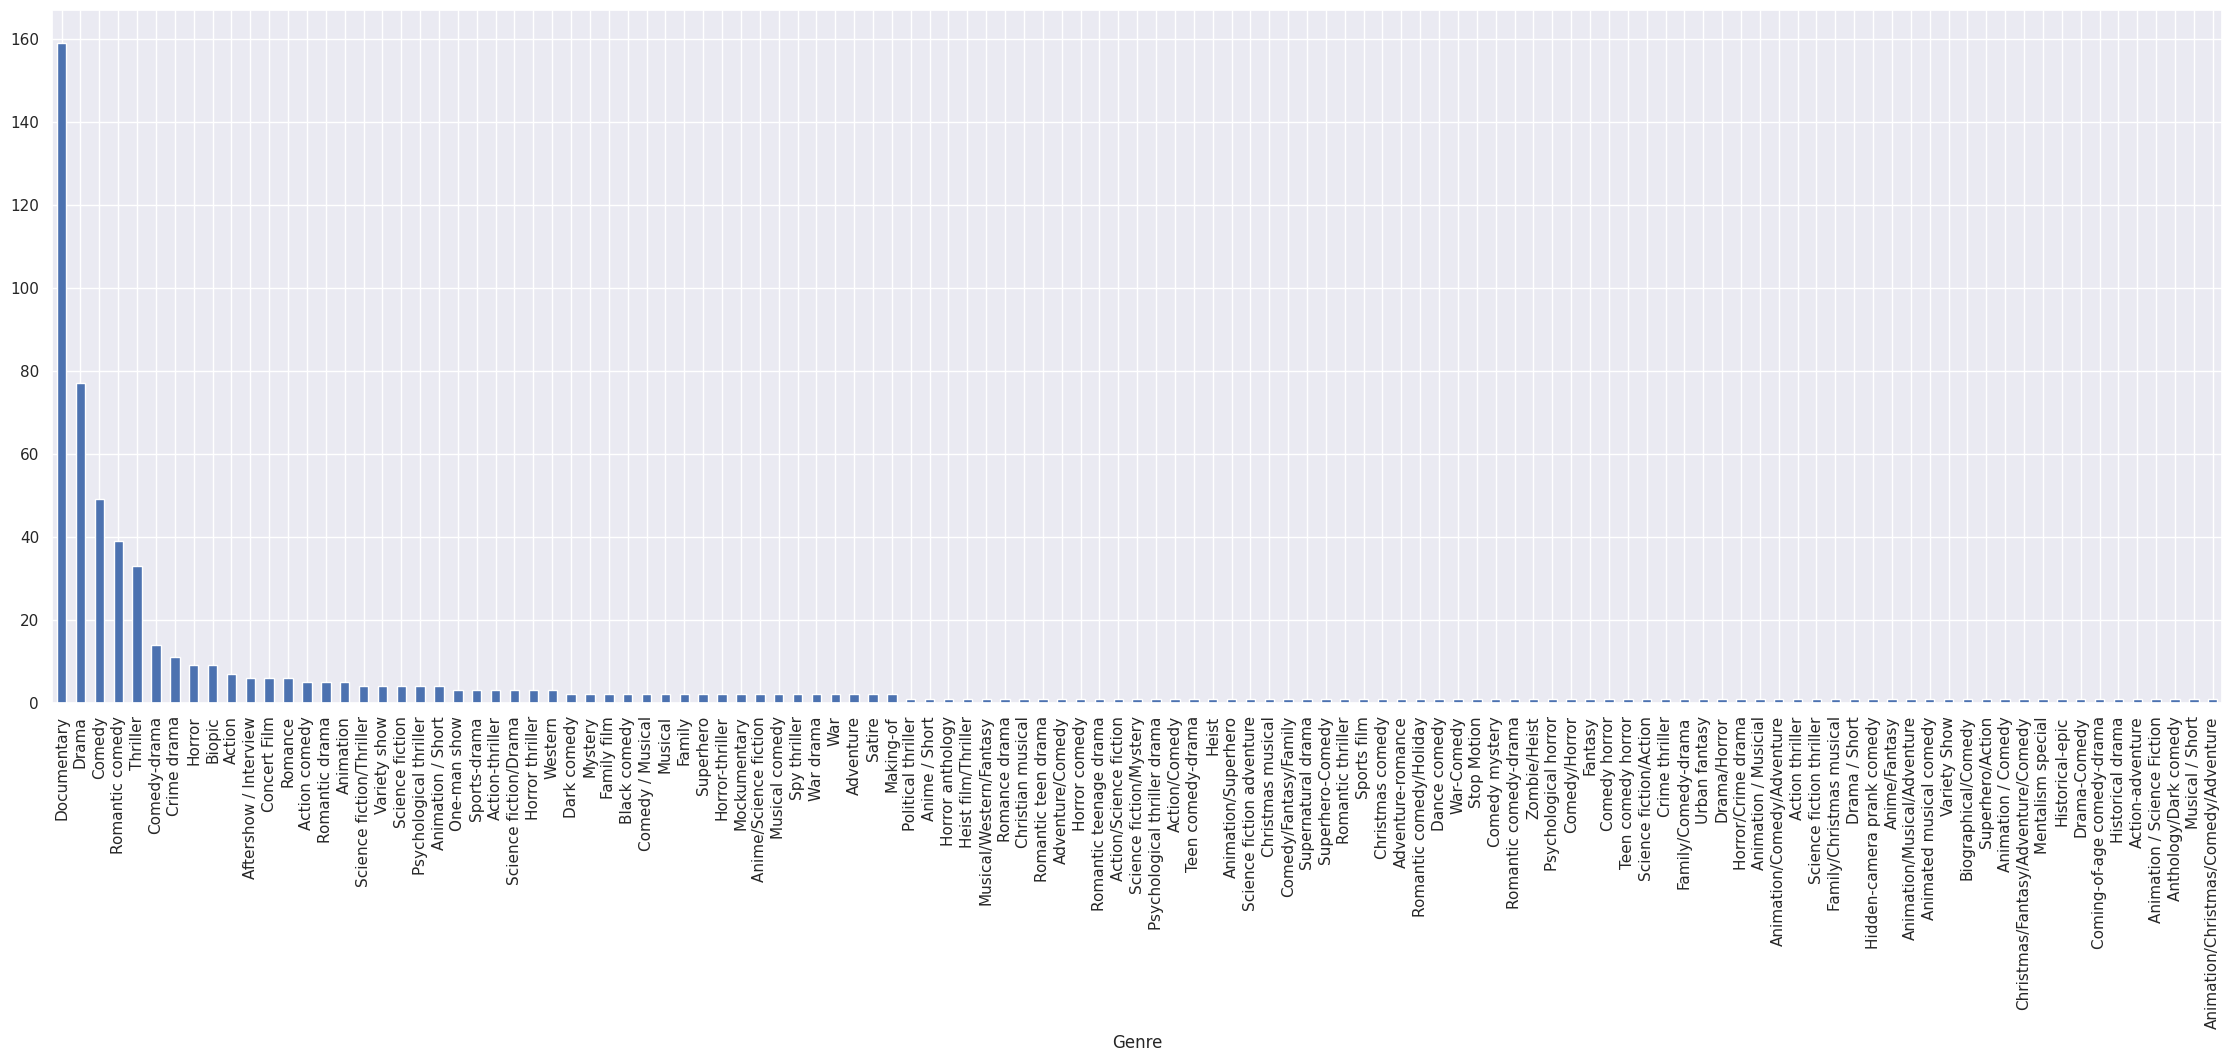

In [19]:
plt.figure(figsize = (28,9))
df.Genre.value_counts().plot(kind='bar')

Top genres fall in Documentary, Drama, Comedy, Romantic comedy, Thriller


In [20]:
genre_high = df[df['IMDB Score']>7][['Genre','Title', 'IMDB Score','Language']].sort_values('IMDB Score', ascending = True)

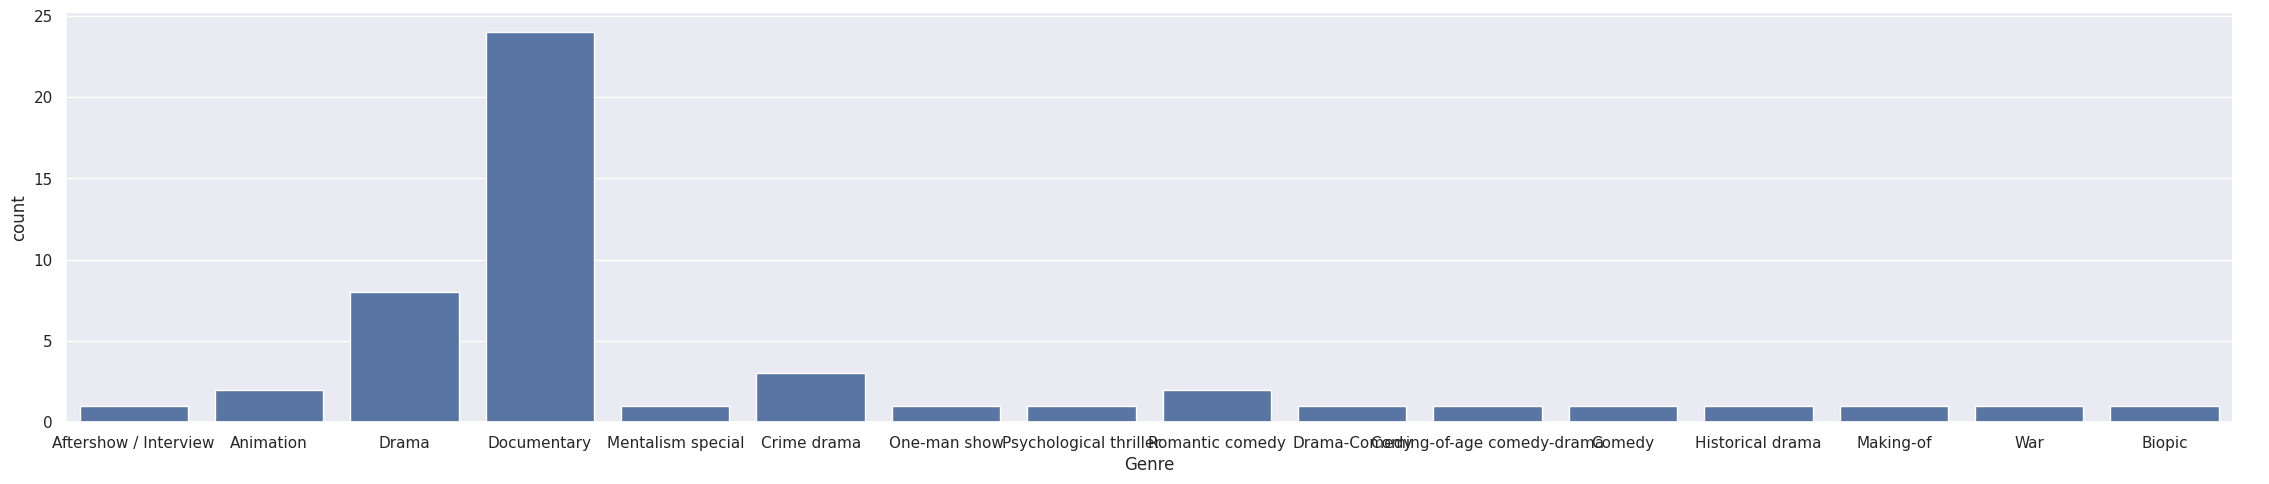

In [21]:
sns.catplot(x="Genre", kind="count", data=genre_high[:50], aspect= 50.7/11.2)

In [22]:
fig = px.bar(genre_high[:50], x='Genre', y= 'IMDB Score', color = 'Title')
fig.show()

# Above are the movies & Top genres where IMDB Score is greater than 7

Move your cursor around the picture to get the details

<Axes: ylabel='count'>

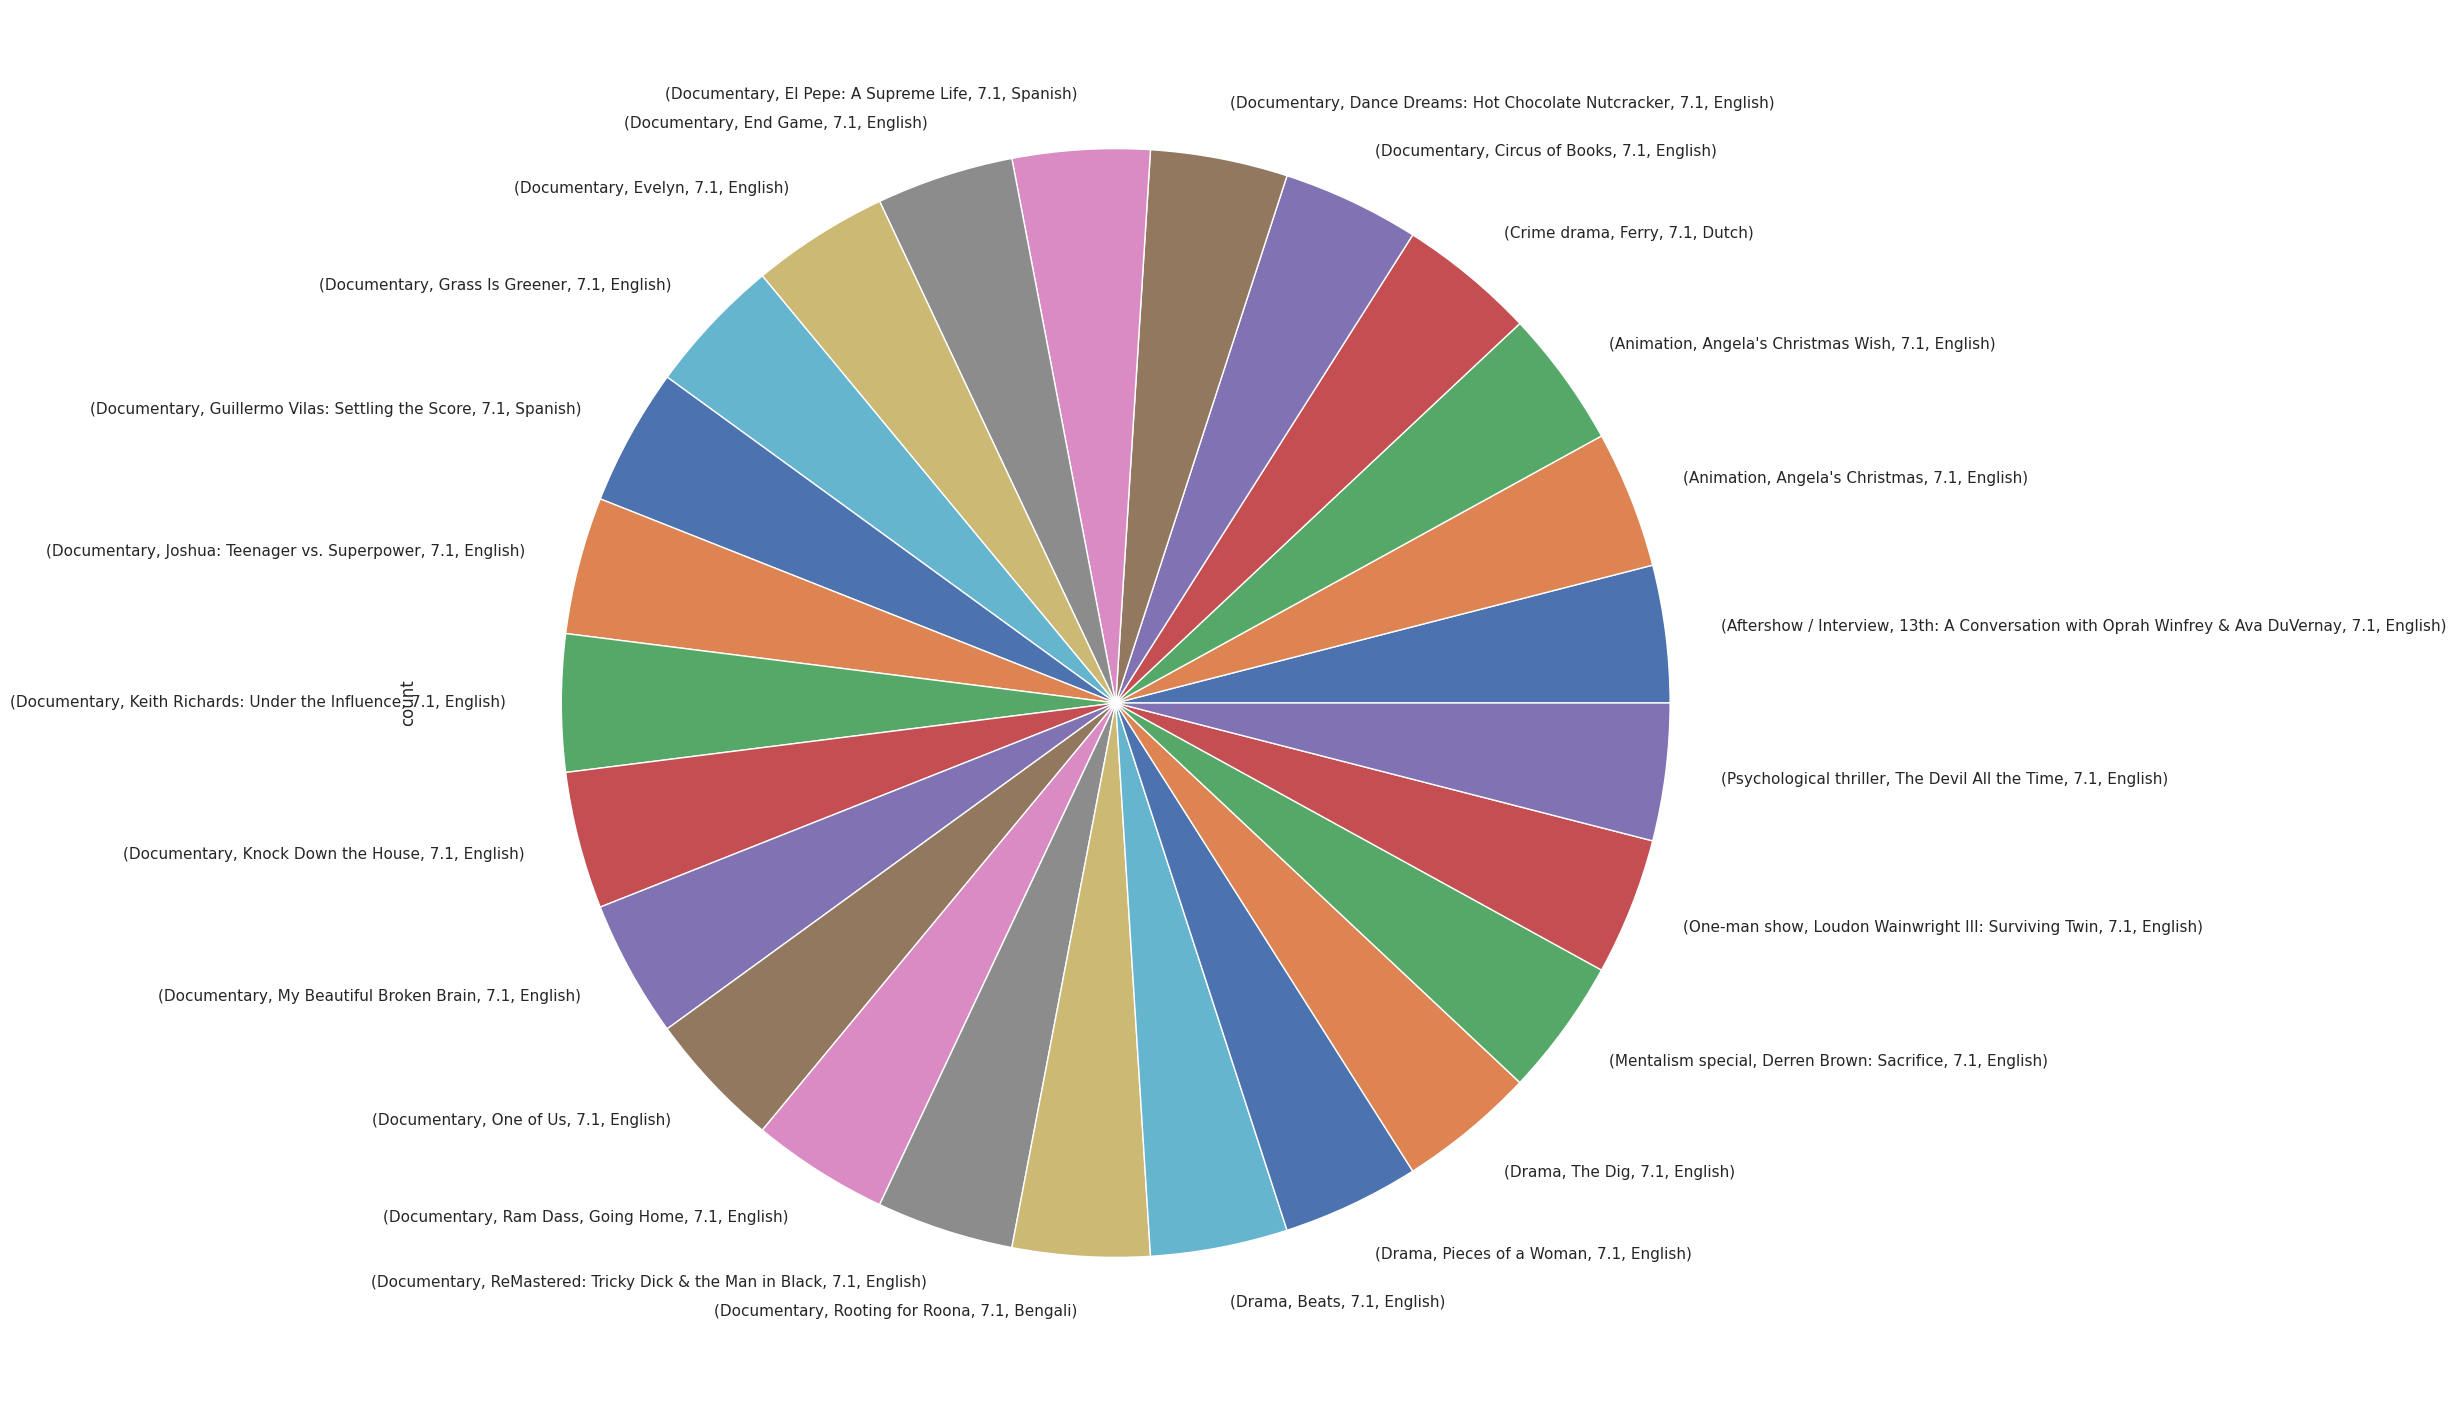

In [23]:
genre_high[:25].value_counts().plot(kind = 'pie')

# Top movies with ratings and Genre above 7 in pie chart
Move your cursor around the picture to get the details

<Axes: ylabel='count'>

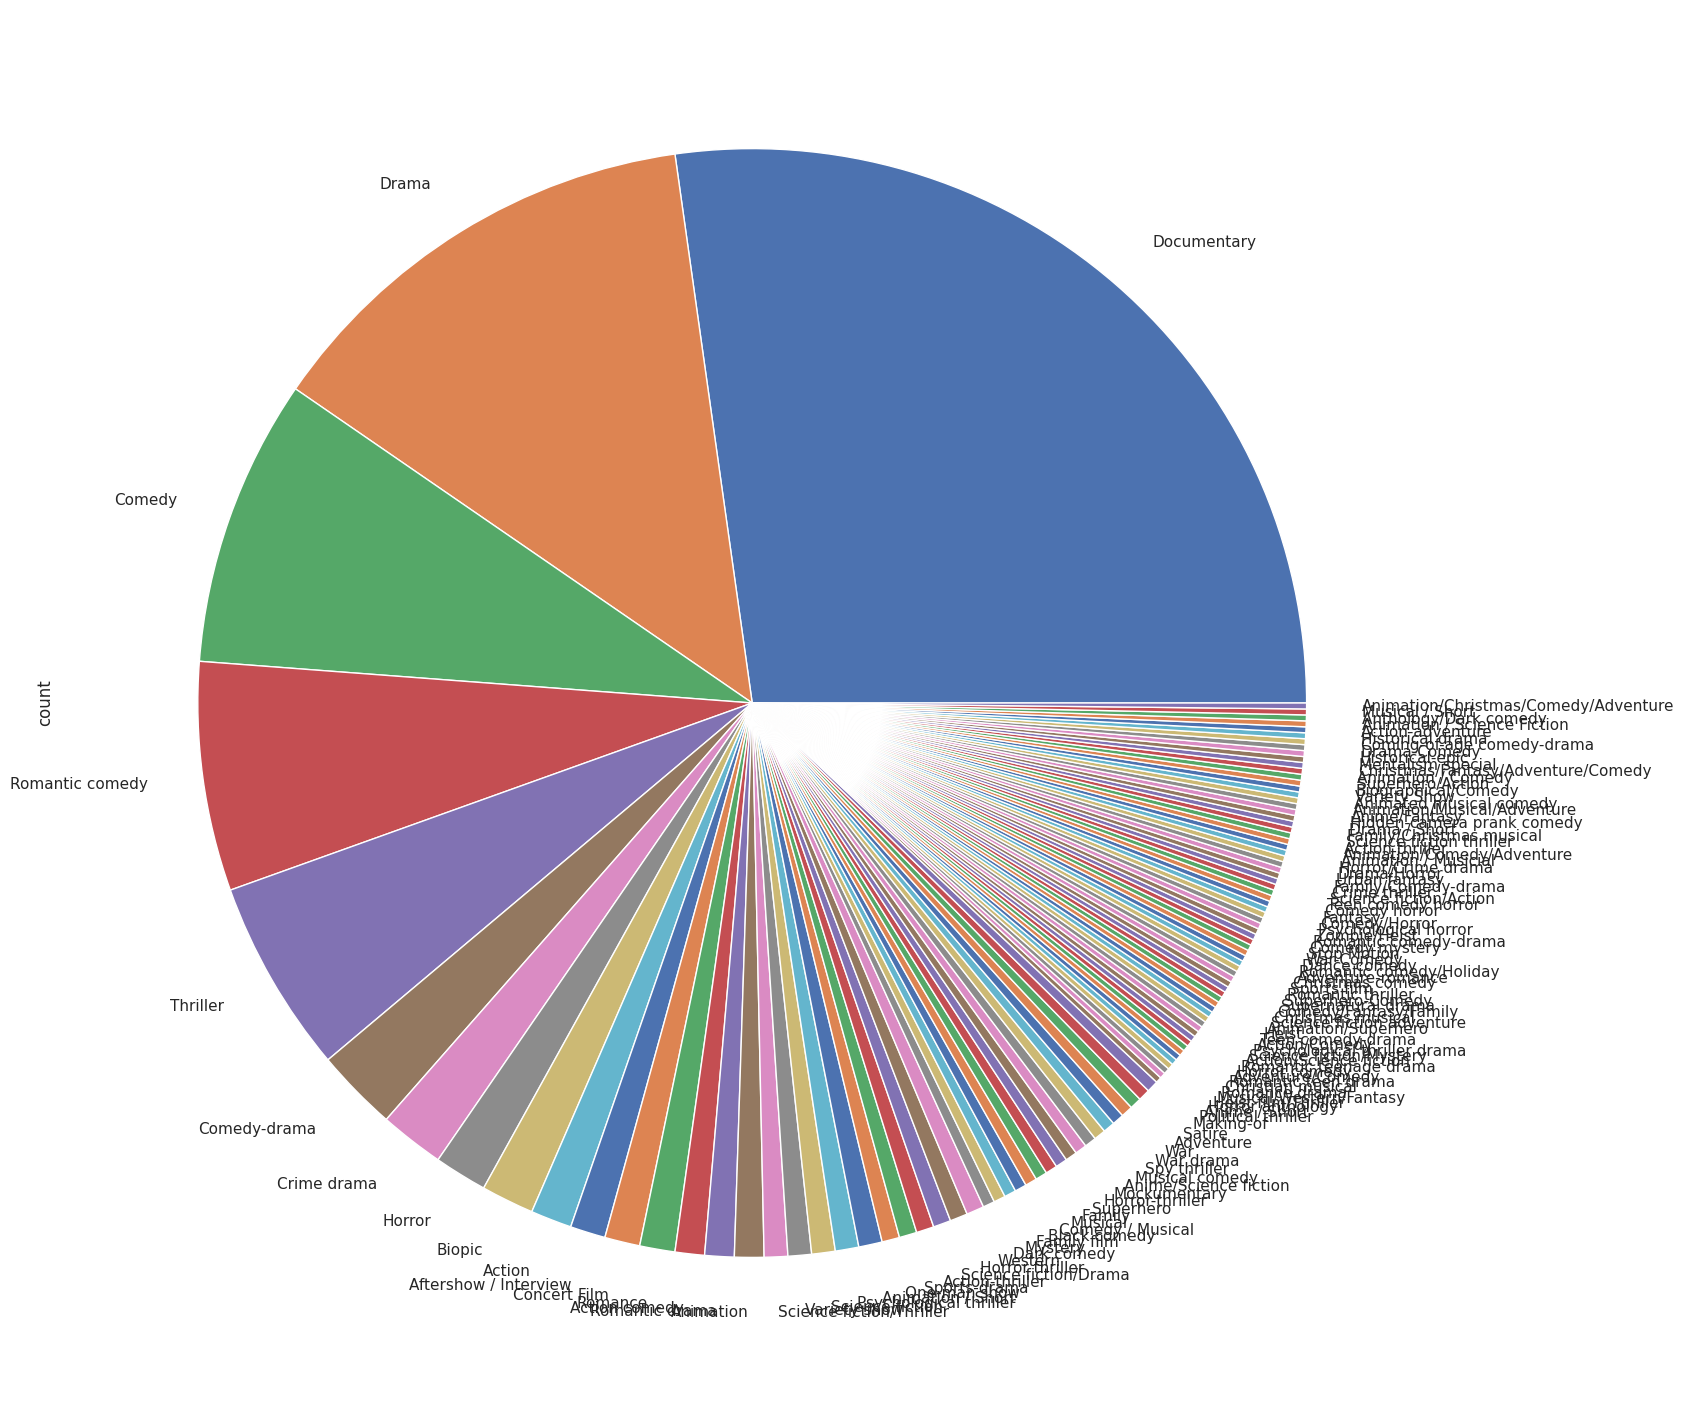

In [24]:
df['Genre'].value_counts().plot(kind = 'pie')

All genre

<Axes: xlabel='Language'>

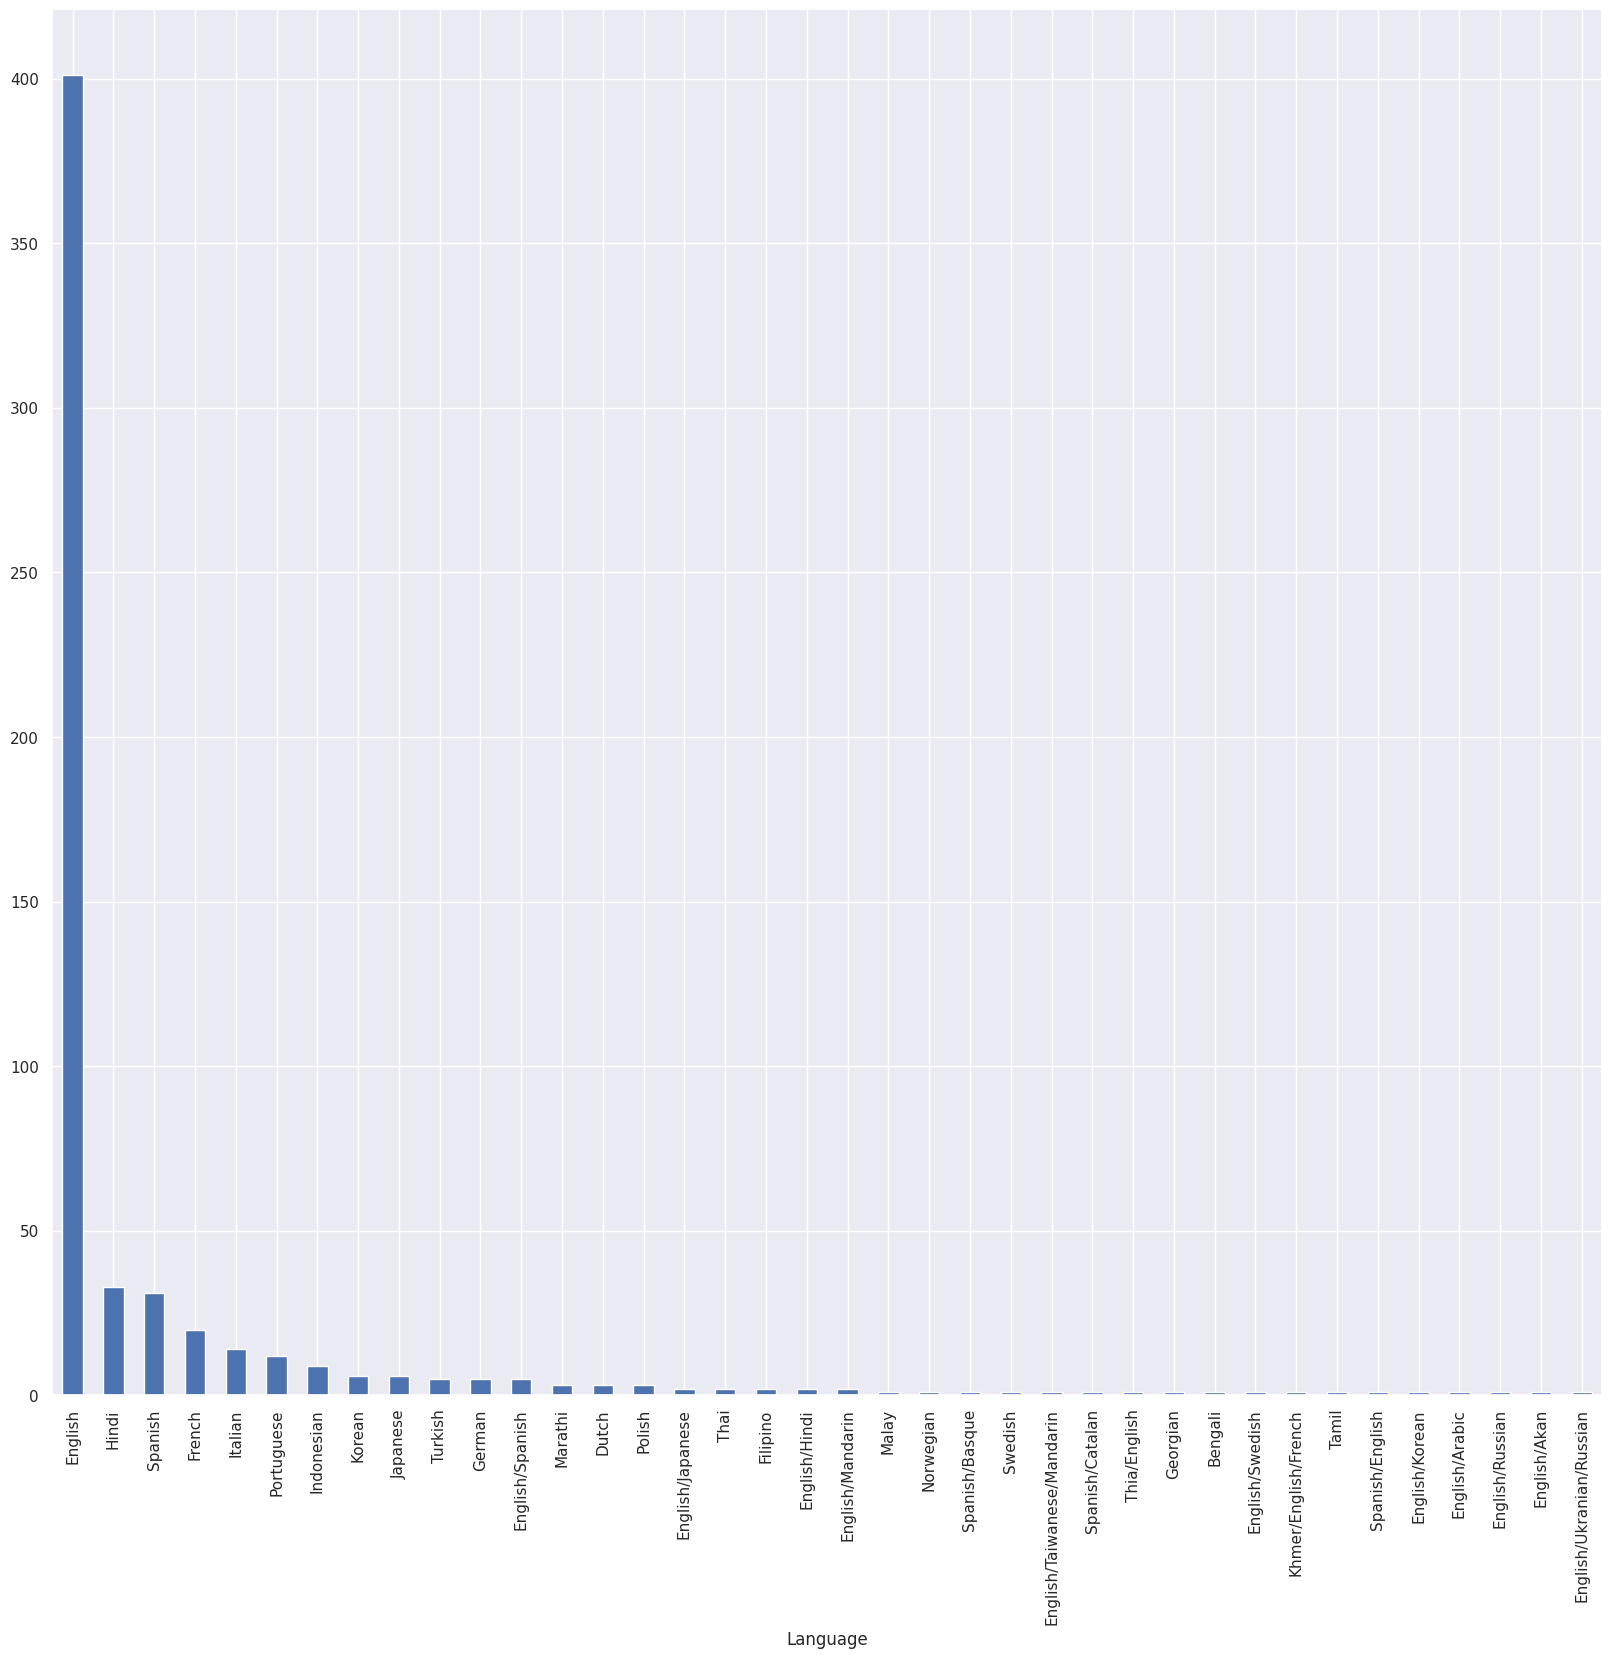

In [25]:
df['Language'].value_counts().plot(kind = 'bar')

In [26]:
fig = px.bar(genre_high[:50], x='Genre', y= 'IMDB Score', color = 'Language')
fig.show()

# Above are the genres with languages and IMDB Score with rating higher than 7

<Axes: xlabel='IMDB Score', ylabel='Title'>

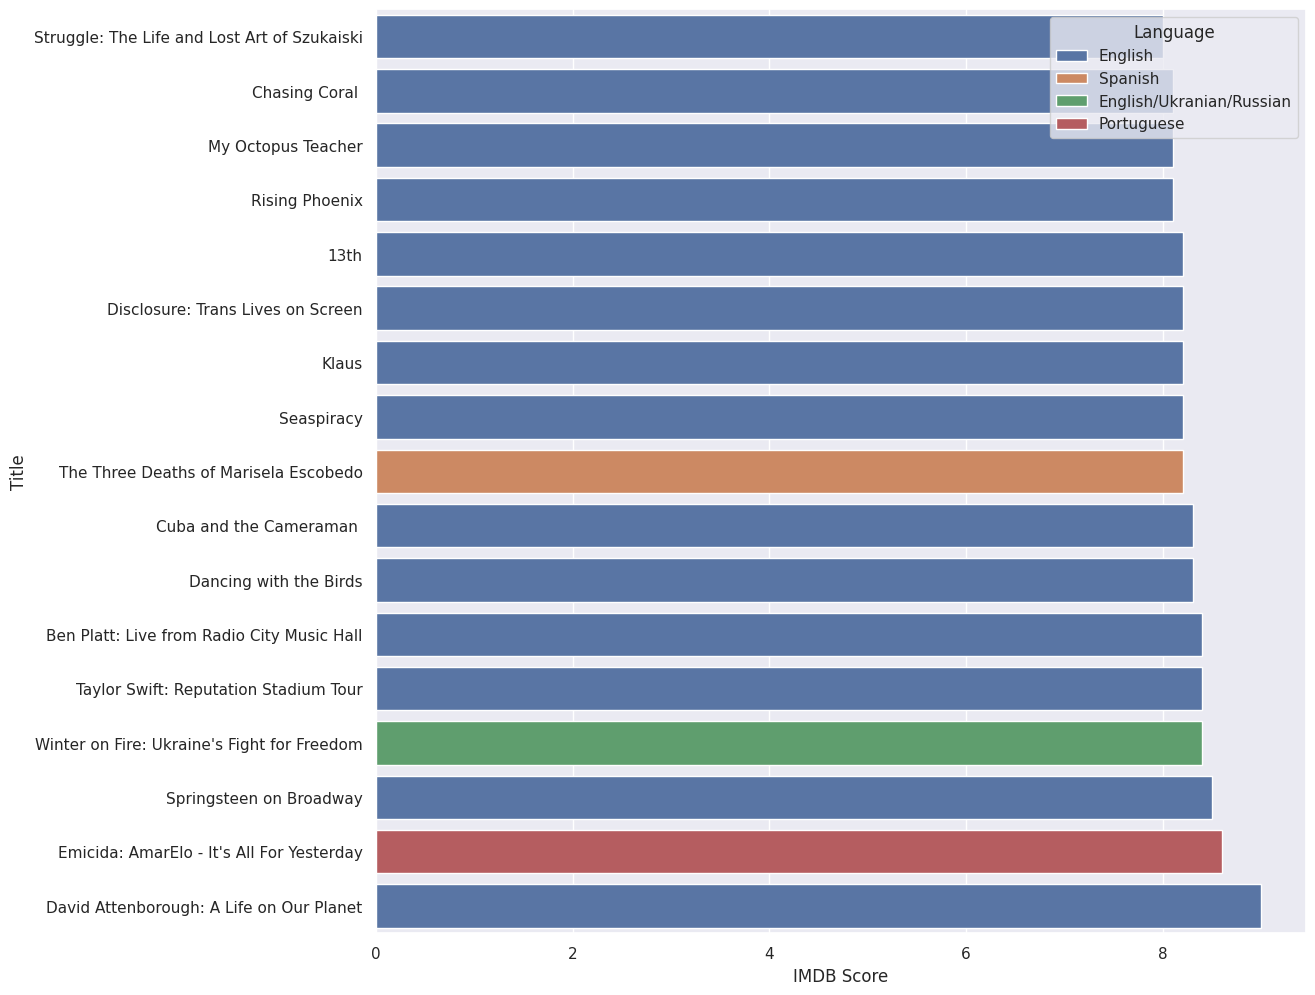

In [27]:
plt.figure(figsize = (12,12))
sns.barplot(x = 'IMDB Score', y = 'Title',hue ='Language', data = score_8)

# Only 3 movies which has ratings over 8 are not in english language


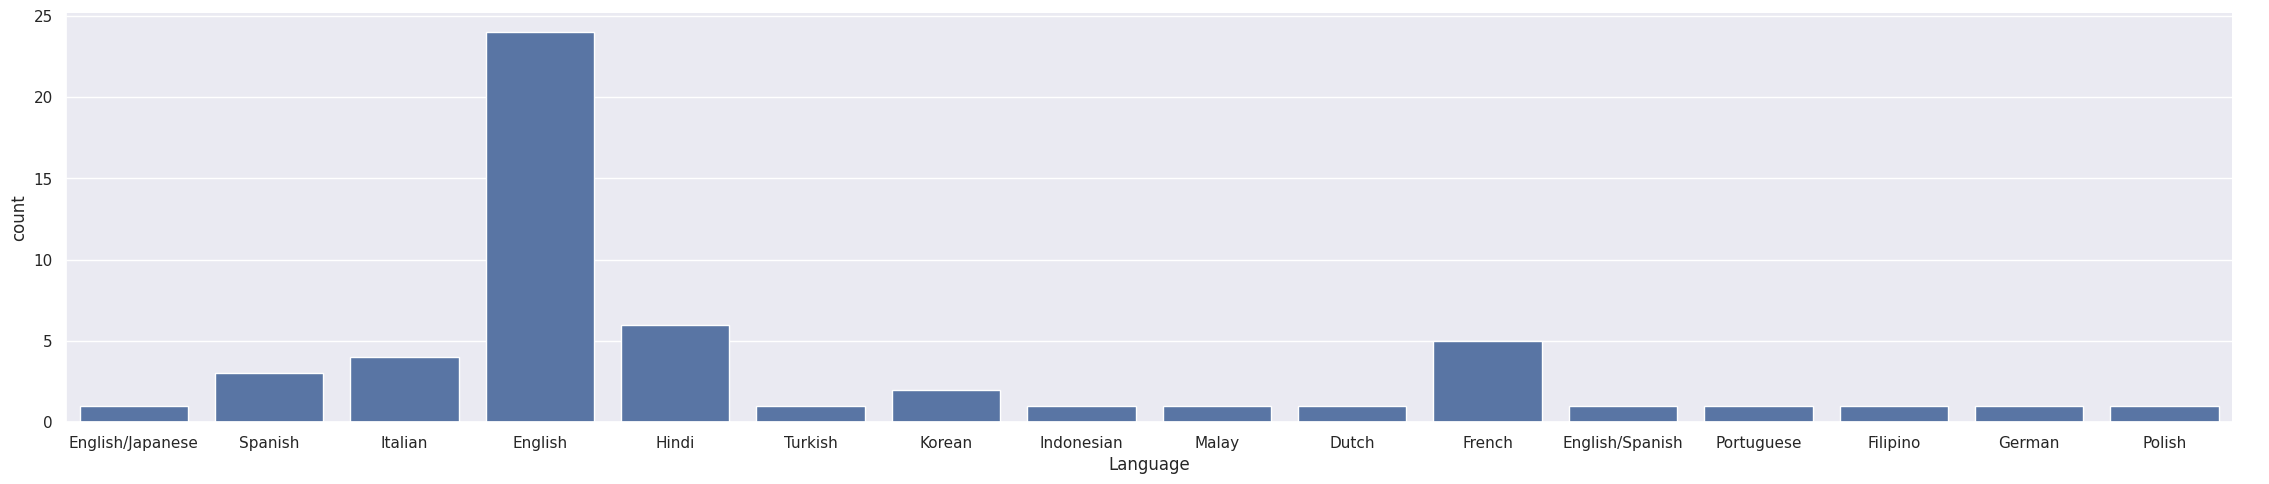

In [28]:
sns.catplot(x="Language", kind="count", data=genre_low, aspect= 50.7/11.2)

# IMDB Movie ratings less than 5 and their languages